In [48]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import wrangle


Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.



In [63]:
iris = datasets.load_iris()


In [13]:
df = pd.DataFrame(data=iris.data, 
                  columns=iris.feature_names)

In [14]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [15]:
train, val, test = wrangle.train_val_test(df)
train.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
81                 5.5               2.4                3.7               1.0
133                6.3               2.8                5.1               1.5
137                6.4               3.1                5.5               1.8
75                 6.6               3.0                4.4               1.4
109                7.2               3.6                6.1               2.5

Choose features other than the ones used in the lesson.


In [20]:
X = train[['sepal width (cm)', 'petal width (cm)']]


In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1], dtype=int32)

In [33]:
train['cluster'] = kmeans.predict(X)


Visualize the results of your clustering.


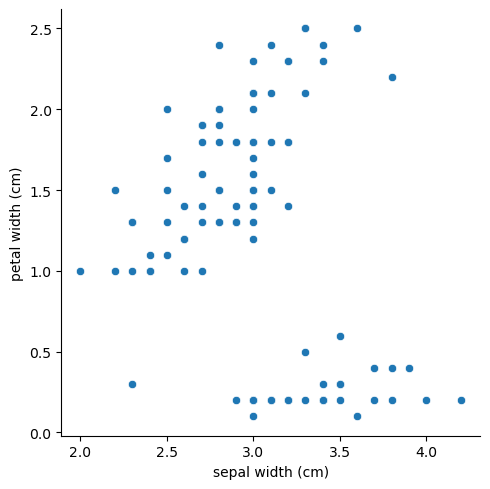

In [26]:
sns.relplot(data = X, x = 'sepal width (cm)', y = 'petal width (cm)')
plt.show()


In [27]:
kmeans.cluster_centers_


array([[3.41333333, 0.24666667],
       [3.04571429, 2.04571429],
       [2.675     , 1.2775    ]])

In [28]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


sepal width (cm)  petal width (cm)
0          3.413333          0.246667
1          3.045714          2.045714
2          2.675000          1.277500

In [35]:
train.groupby('cluster')['petal width (cm)', 'sepal width (cm)'].mean()


petal width (cm)  sepal width (cm)
cluster                                    
0                0.246667          3.413333
1                2.045714          3.045714
2                1.277500          2.675000

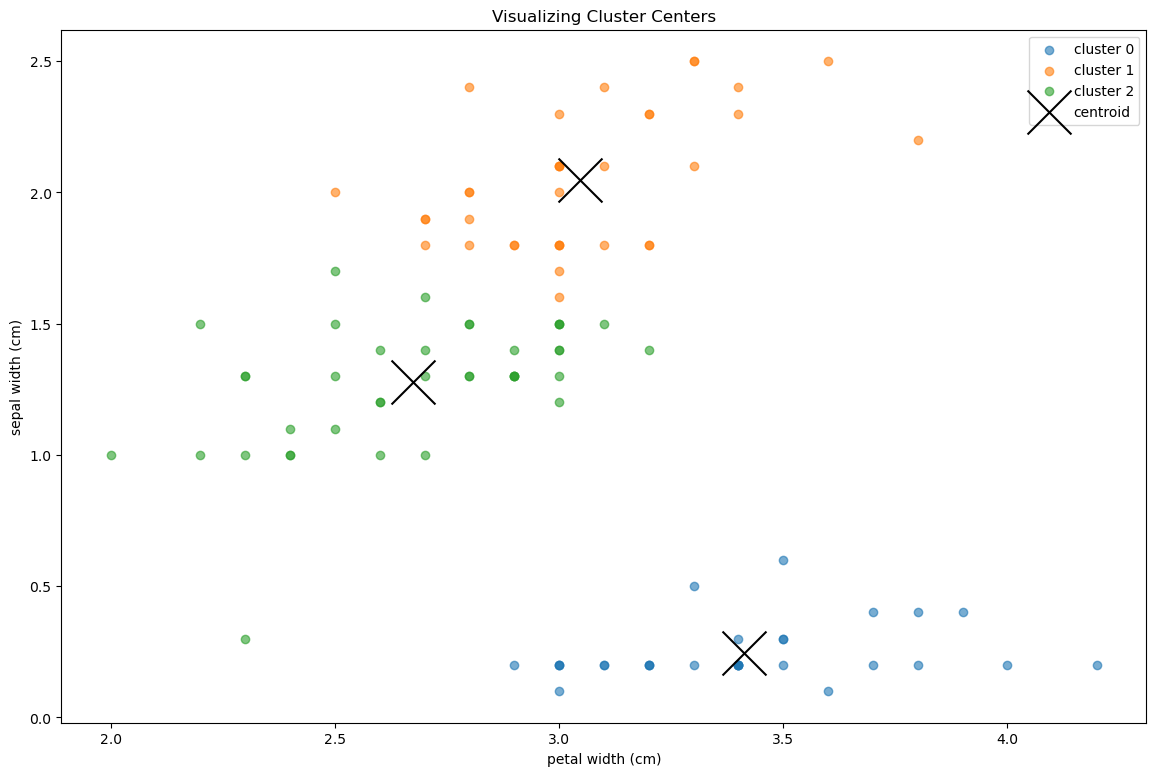

In [39]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset['sepal width (cm)'], subset['petal width (cm)'], label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal width (cm)', x='sepal width (cm)', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal width (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Visualizing Cluster Centers')

plt.show()


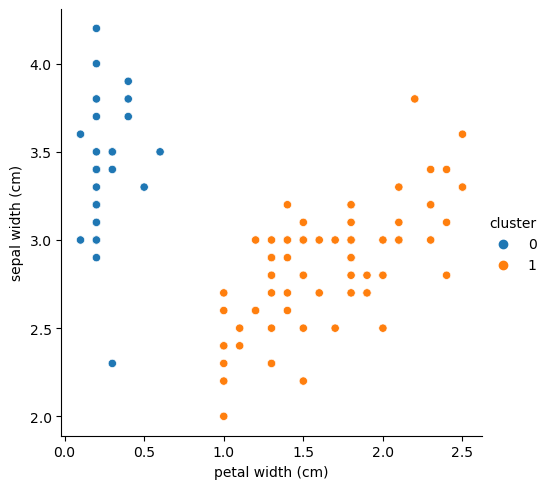

In [40]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='petal width (cm)', y='sepal width (cm)', hue='cluster')
plt.show()

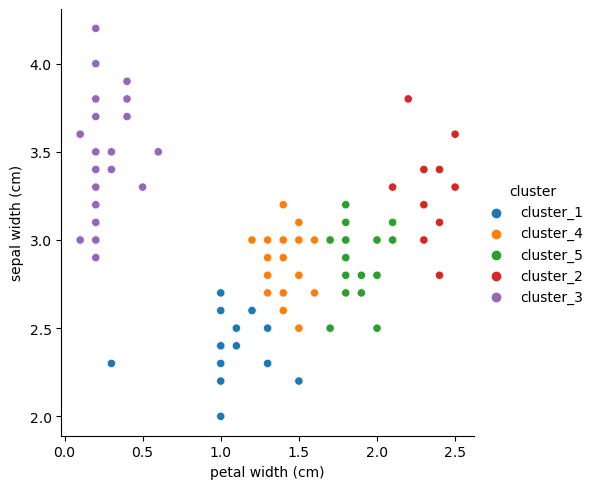

In [44]:
kmeans = KMeans(n_clusters=5).fit(X)
train['cluster'] = kmeans.predict(X)
train.cluster = 'cluster_' + (train.cluster + 1).astype('str')
sns.relplot(data=train, x='petal width (cm)', y='sepal width (cm)', hue='cluster')
plt.show()

Use the elbow method to visually select a good value for k.


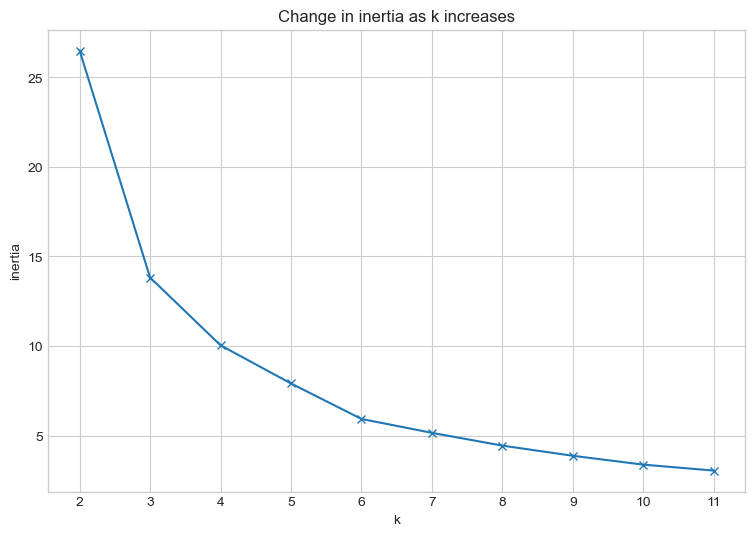

In [47]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    plt.show()

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [49]:
sql_url = wrangle.get_connection('mall_customers')

In [50]:
query = '''
        SELECT *
        FROM customers
        '''

In [51]:
mall_df = pd.read_sql(query, sql_url)
mall_df.head()

customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40

In [52]:
see = 42
train, test, val = wrangle.train_val_test(mall_df)

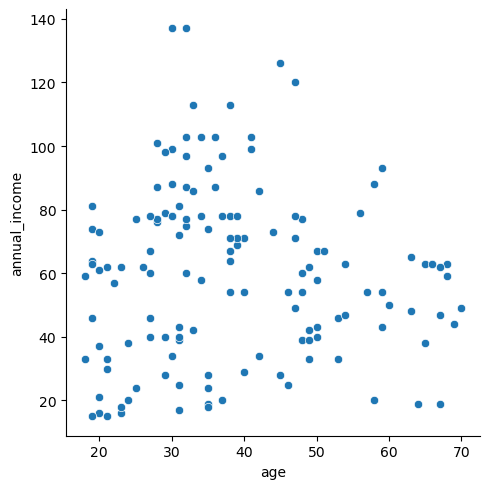

In [53]:
sns.relplot(data = train, x= 'age', y = 'annual_income')
plt.show()

In [54]:
x = train[['age', 'annual_income']]

In [55]:
kmeans = KMeans(n_clusters = 3)

kmeans.fit(x)

kmeans.predict(x)

array([0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2,
       0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2,
       2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 1, 2, 1, 0, 1], dtype=int32)

In [56]:
x['unscaled_clusters'] = kmeans.predict(x)
x.head()

age  annual_income  unscaled_clusters
169   32             87                  0
97    27             60                  0
31    21             30                  2
12    58             20                  2
35    21             33                  2

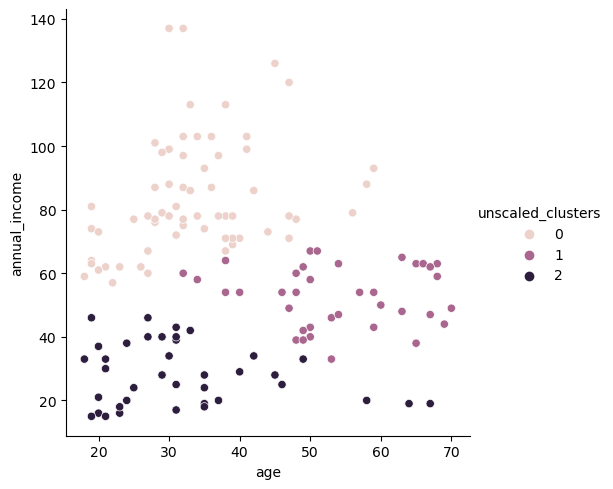

In [57]:
sns.relplot(data = x, x = 'age', y = 'annual_income', hue = 'unscaled_clusters')
plt.show()

In [58]:
mm_scaler = MinMaxScaler()

x[['age', 'annual_income']] = mm_scaler.fit_transform(x[['age', 'annual_income']])

x.head()

age  annual_income  unscaled_clusters
169  0.269231       0.590164                  0
97   0.173077       0.368852                  0
31   0.057692       0.122951                  2
12   0.769231       0.040984                  2
35   0.057692       0.147541                  2

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [59]:
seed = 42
kmeans_scale = KMeans(n_clusters = 3, random_state = seed)

kmeans_scale.fit(x[['age', 'annual_income']])

KMeans(n_clusters=3, random_state=42)

In [60]:
x['scaled_clusters'] = kmeans_scale.predict(x[['age', 'annual_income' ]])

x.head()

age  annual_income  unscaled_clusters  scaled_clusters
169  0.269231       0.590164                  0                0
97   0.173077       0.368852                  0                2
31   0.057692       0.122951                  2                2
12   0.769231       0.040984                  2                1
35   0.057692       0.147541                  2                2

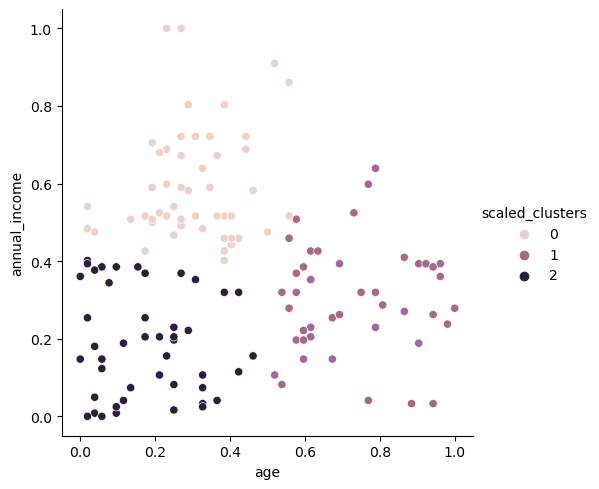

In [61]:
sns.relplot(data = x, x = 'age', y = 'annual_income', hue = 'scaled_clusters')
plt.show()

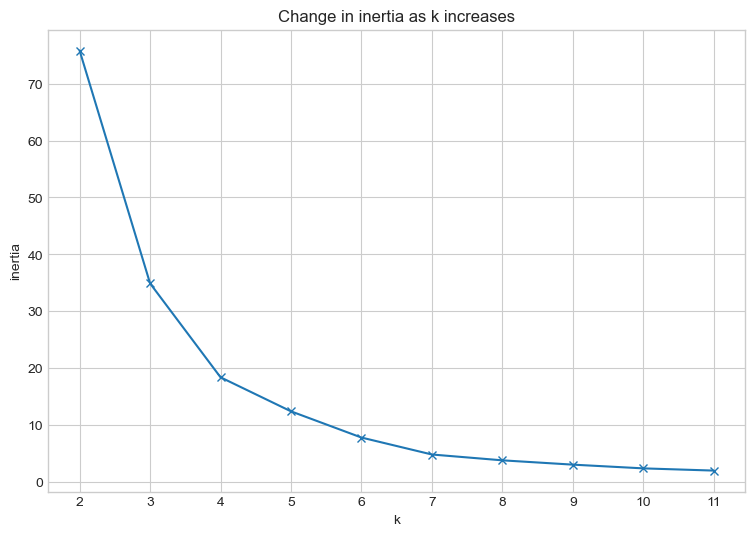

In [62]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

    plt.show()